### Classe da Empresa

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class Empresa:
    def __init__(self, config):
        self.nome = config.get("nome")
        self.receita = config.get("receita")
        self.propaganda = config.get("propaganda")
        self.num_vendedores = config.get("num_vendedores")
        self.salario_vendedores = config.get("salario_vendedores")
        self.hora_extra = config.get("hora_extra")
        self.estocagem = config.get("estocagem")

    def calcular_despesas(self):
        salario_total = self.num_vendedores * self.salario_vendedores
        custo_hora_extra = self.hora_extra if self.hora_extra is not None else 0
        custo_estocagem = self.estocagem if self.estocagem is not None else 0

        despesas = {
            "Propaganda": self.propaganda,
            "Salário Vendedores": salario_total,
            "Hora Extra": custo_hora_extra,
            "Estocagem": custo_estocagem
        }

        return despesas

    def calcular_cmv(self):
        return 0.2 * self.receita

    def calcular_despesas_fixas(self):
        return {
            "Salários": 0.08 * self.receita,
            "Aluguel": 2000
        }

    def calcular_total_despesas(self):
        despesas = self.calcular_despesas()
        despesas_fixas = self.calcular_despesas_fixas()

        total_despesas = sum(despesas.values()) + sum(despesas_fixas.values())
        return total_despesas

    def calcular_resultado(self):
        return self.receita - self.calcular_cmv() - self.calcular_total_despesas()

    def esta_falida(self):
        return self.calcular_resultado() < 0

### Inputting Data

In [8]:
def adicionar_empresa():
    nome = input("Nome da Empresa: ")
    receita = float(input("Receita de vendas (faturamento): "))
    propaganda = float(input("Despesa com propaganda: "))
    num_vendedores = int(input("Número de vendedores: "))
    salario_vendedores = float(input("Salário por vendedor: "))
    hora_extra = float(input("Custo de hora extra (ou Enter para 0): ") or 0)
    estocagem = float(input("Custo de estocagem (ou Enter para 0): ") or 0)

    nova_empresa_data = {
        "nome": nome,
        "receita": receita,
        "propaganda": propaganda,
        "num_vendedores": num_vendedores,
        "salario_vendedores": salario_vendedores,
        "hora_extra": hora_extra,
        "estocagem": estocagem
    }

    nova_empresa = Empresa(nova_empresa_data)
    empresas.append(nova_empresa)
    print(f"\nEmpresa {nome} adicionada com sucesso!")

In [9]:
empresas = []

# Empresa 1
empresa_data1 = {
    "nome": "Empresa 1",
    "receita": 29632,
    "propaganda": 9000,
    "num_vendedores": 8,
    "salario_vendedores": 1500,
    "hora_extra": 10,
    "estocagem": 4
}

empresa1 = Empresa(empresa_data1)
empresas.append(empresa1)

# Empresa 2
empresa_data2 = {
    "nome": "Empresa 2",
    "receita": 66412,
    "propaganda": 12000,
    "num_vendedores": 10,
    "salario_vendedores": 1500,
    "hora_extra": 10,
    "estocagem": 4
}

empresa2 = Empresa(empresa_data2)
empresas.append(empresa2)

# Empresa 3
empresa_data3 = {
    "nome": "Empresa 3",
    "receita": 83962,
    "propaganda": 15000,
    "num_vendedores": 12,
    "salario_vendedores": 1500,
    "hora_extra": 10,
    "estocagem": 4
}

empresa3 = Empresa(empresa_data3)
empresas.append(empresa3)

# Empresa 4
empresa_data4 = {
    "nome": "Empresa 4",
    "receita": 49854,
    "propaganda": 18000,
    "num_vendedores": 7,
    "salario_vendedores": 1500,
    "hora_extra": 10,
    "estocagem": 4
}

empresa4 = Empresa(empresa_data4)
empresas.append(empresa4)

# Empresa 5
empresa_data5 = {
    "nome": "Empresa 5",
    "receita": 20138,
    "propaganda": 10000,
    "num_vendedores": 10,
    "salario_vendedores": 1500,
    "hora_extra": 10,
    "estocagem": 4
}

empresa5 = Empresa(empresa_data5)
empresas.append(empresa5)


# Adicionar novas empresas dadas pelo usuario
adicionar_empresa()

# Print results for each company
for idx, empresa in enumerate(empresas, start=1):
    print(f"\nResultados para a Empresa {idx} ({empresa.nome}):")
    print("Resultado:", empresa.calcular_resultado())
    print("Está falida?", empresa.esta_falida())



Empresa abc adicionada com sucesso!

Resultados para a Empresa 1 (Empresa 1):
Resultado: -1678.9599999999991
Está falida? True

Resultados para a Empresa 2 (Empresa 2):
Resultado: 18802.64
Está falida? False

Resultados para a Empresa 3 (Empresa 3):
Resultado: 25438.640000000007
Está falida? False

Resultados para a Empresa 4 (Empresa 4):
Resultado: 5380.879999999997
Está falida? False

Resultados para a Empresa 5 (Empresa 5):
Resultado: -12514.640000000001
Está falida? True

Resultados para a Empresa 6 (abc):
Resultado: -40981.0
Está falida? True



Demonstrativo de Resultados
Empresa	Resultado	Classificação	Status
Empresa 1	-1678.96		2		Falida
Empresa 2	18802.64		4		Ativa
Empresa 3	25438.64		5		Ativa
Empresa 4	5380.88		3		Ativa
Empresa 5	-12514.64		1		Falida


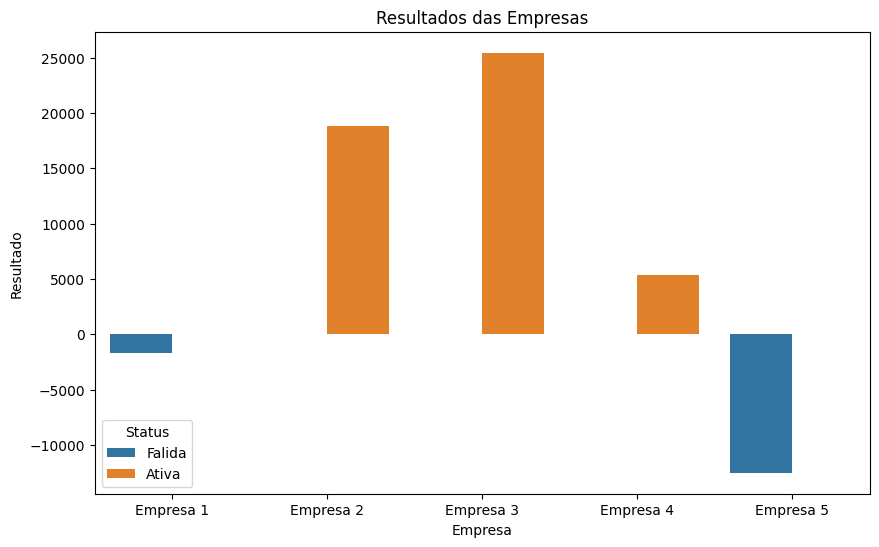

In [6]:
# Calculating and displaying the results
resultados = []
for empresa in empresas:
    resultado = empresa.calcular_resultado()
    resultados.append(resultado)

# Sorting the companies
classificacao = sorted(enumerate(resultados, start=1), key=lambda x: x[1])
classificacao_final = {empresa[0]: i for i, empresa in enumerate(classificacao, start=1)}

# Displaying the results
print("\nDemonstrativo de Resultados")
print("Empresa\tResultado\tClassificação\tStatus")
for i, (empresa, resultado) in enumerate(zip(empresas, resultados), start=1):
    status = "Falida" if empresa.esta_falida() else "Ativa"
    print(f"{empresa.nome}\t{resultado:.2f}\t\t{classificacao_final[i]}\t\t{status}")

# Creating a DataFrame
data = {
    "Empresa": [empresa.nome for empresa in empresas],
    "Resultado": resultados,
    "Status": ["Falida" if empresa.esta_falida() else "Ativa" for empresa in empresas]
}
df = pd.DataFrame(data)

# Plotting a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Empresa", y="Resultado", hue="Status", data=df)
plt.title("Resultados das Empresas")
plt.xlabel("Empresa")
plt.ylabel("Resultado")
plt.show()